In [478]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [479]:
ubicacion = r"C:\Users\randy\EBAC.PRACTICAS\drugs (1).csv"
df = pd.read_csv('drugs (1).csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


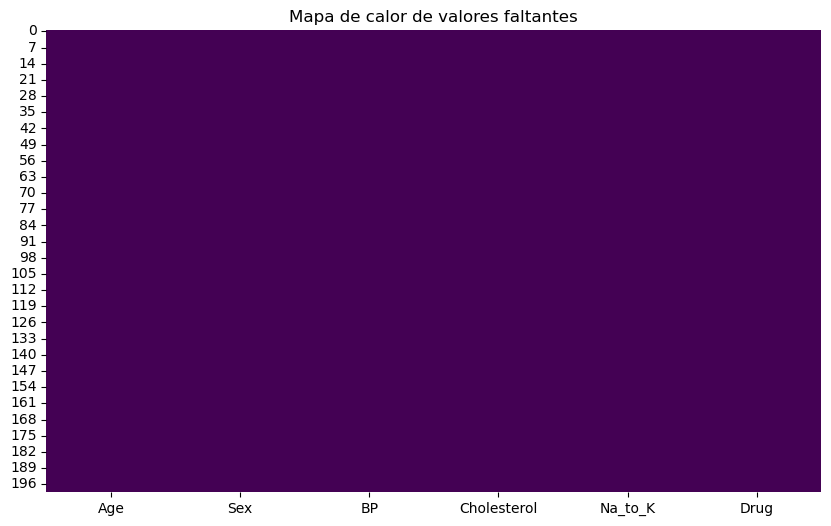

In [480]:
import seaborn as sns

# Generar un mapa de calor para detectar valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

In [481]:
# Checamos los valores de la variable a predecir 'Drug'
valores_unicos_Drug = df['Drug'].unique()
print(valores_unicos_Drug)

['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [482]:
# Checamos los valores de la variable 'Cholesterol' para identificar que modificaciones se le pueden hacer
valores_unicos_cholesterol = df['Cholesterol'].unique()
print(valores_unicos_cholesterol)

['HIGH' 'NORMAL']


In [483]:
# Checamos los valores de la variable 'BP' para identificar que modificaciones se le pueden hacer
valores_unicos_BP = df['BP'].unique()
print(valores_unicos_BP)

['HIGH' 'LOW' 'NORMAL']


In [484]:
# Checamos los valores de la variable 'BP' para identificar que modificaciones se le pueden hacer
valores_unicos_Drug = df['Drug'].unique()
print(valores_unicos_Drug)

['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [485]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [486]:
# Convertir las variables categoricas a numericas
# Creamos un objeto de la clase LabelEncoder
le_sex = preprocessing.LabelEncoder()
le_bp = preprocessing.LabelEncoder()
le_cholesterol = preprocessing.LabelEncoder()
le_drug = preprocessing.LabelEncoder()
le_Na_to_K = preprocessing.LabelEncoder()

In [487]:
# Realizamos la tranformacion de las variables categoricas a numericas
df['Sex_encoded'] = le_sex.fit_transform(df['Sex'])
df['BP_encoded'] = le_bp.fit_transform(df['BP'])
df['Cholesterol_encoded'] = le_cholesterol.fit_transform(df['Cholesterol'])
df['Na_to_K_encoded'] = le_Na_to_K.fit_transform(df['Na_to_K'])
df['Drug_encoded'] = le_drug.fit_transform(df['Drug'])

In [488]:
# Eliminamos las variables categoricas	
df = df.drop(['Sex', 'BP', 'Cholesterol', 'Drug', 'Na_to_K'], axis=1)

In [489]:
df.dtypes

Age                    int64
Sex_encoded            int32
BP_encoded             int32
Cholesterol_encoded    int32
Na_to_K_encoded        int64
Drug_encoded           int32
dtype: object

In [490]:
feature_cols = ['Age', 'Sex_encoded', 'BP_encoded', 'Cholesterol_encoded', 'Na_to_K_encoded']
X = df[feature_cols]
y = df.Drug_encoded

In [491]:
from sklearn.ensemble import RandomForestClassifier

In [492]:
# Creacion de grupos de entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [493]:
rf = RandomForestClassifier(n_estimators=100, random_state=1) # Creacion del modelo y le damos el numero total de arboles por generar
rf.fit(X_train, y_train) 

RandomForestClassifier(random_state=1)

In [494]:
# Score F1 para el grupo de entrenamiento 
rf.score(X_train, y_train)

1.0

In [495]:
# Score F1 con los datos de prueba
rf.score(X_test, y_test)

0.975

In [496]:
# Estadisticas de desempeño
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      0.75      0.86         4
           3       0.93      1.00      0.96        13
           4       1.00      1.00      1.00        17

    accuracy                           0.97        40
   macro avg       0.99      0.95      0.96        40
weighted avg       0.98      0.97      0.97        40



In [497]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance(df, modelo):    # Esta funcion se va a encargar de graficar la importancia de las caracteristicas
    n_fatures = feature_cols
    plt.barh(n_fatures, modelo.feature_importances_, align='center')
    plt.xlabel('Importancia de las variables')
    plt.ylabel('Caracteristicas')
    plt.show()

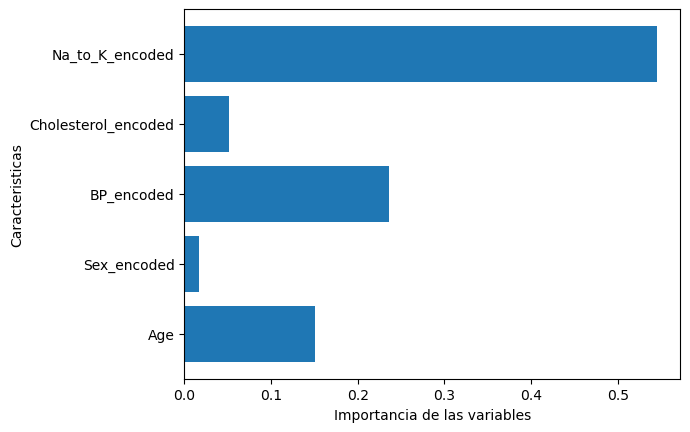

In [498]:
plot_feature_importance(df, rf)
# Notamos que la variable Na_to_K es la mas importante para predecir el tipo de droga que se le va a recetar a un paciente

# Gradient Boosted Trees

In [499]:
from sklearn.ensemble import GradientBoostingClassifier

In [500]:
# Creacion de grupos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [501]:
# Creacion del modelo
gbt = GradientBoostingClassifier(n_estimators=100, random_state=1) # 100 arboles de profundidad de 3 (por default)
gbt.fit(X_train, y_train) # Entrenamiento del modelo

GradientBoostingClassifier(random_state=1)

In [502]:
# Score f1 para el grupo de entrenamiento
gbt.score(X_train, y_train)

1.0

In [503]:
# Score f1 para el grupo de prueba
gbt.score(X_test, y_test)

0.975

In [504]:
# Estadisticas de desempeñó general
y_pred = gbt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00        13
           4       1.00      0.94      0.97        17

    accuracy                           0.97        40
   macro avg       0.96      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



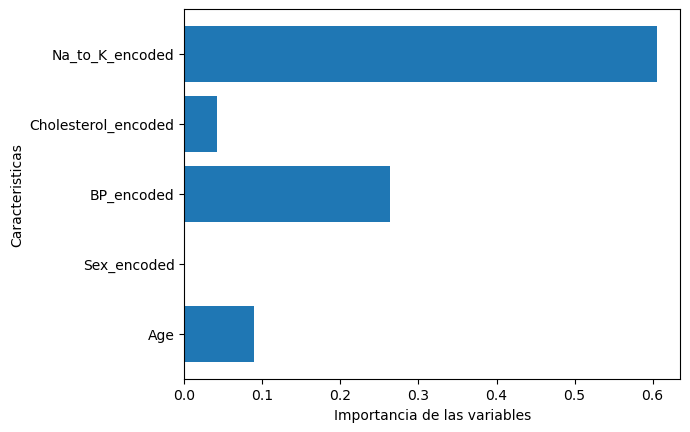

In [505]:
plot_feature_importance(df, gbt)

In [506]:
# Intento alternativo de Gradient Boosting 
gbt = GradientBoostingClassifier(n_estimators=100, random_state=1, max_depth=2)
gbt.fit(X_train, y_train)


print('F1 score training ,', gbt.score(X_train, y_train))
print('F1 score test ,', gbt.score(X_test, y_test))

F1 score training , 1.0
F1 score test , 0.975


In [507]:
# Estadisticas de desempeño
y_pred = gbt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00        13
           4       1.00      0.94      0.97        17

    accuracy                           0.97        40
   macro avg       0.96      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



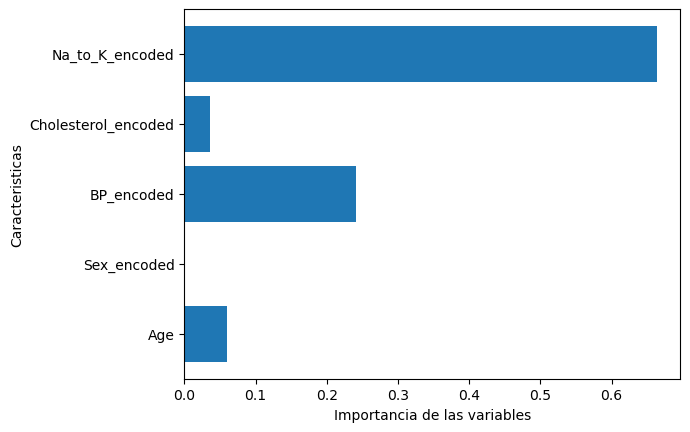

In [508]:
plot_feature_importance(df, gbt)


# Adaboost Classifier

In [509]:
from sklearn.ensemble import AdaBoostClassifier

In [510]:
# Creacion de grupos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [511]:
# Creacion del modelo Adaboost 
# Usa arboles de decision como clasificador por default
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Entrenamiento del clasificador
model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [512]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.72      1.00      0.84        13
           4       1.00      0.94      0.97        17

    accuracy                           0.82        40
   macro avg       0.48      0.59      0.52        40
weighted avg       0.73      0.82      0.76        40



# Utilizacion de SVM como clasificador para Adaboost

In [513]:
from sklearn.svm import SVC

svc = SVC(probability=True, kernel='linear')

In [514]:
# Creacion del objeto de clasificacion Adaboost
abs = AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=1)

model = abc.fit(X_train, y_train)  

y_pred = model.predict(X_test)

In [515]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.72      1.00      0.84        13
           4       1.00      0.94      0.97        17

    accuracy                           0.82        40
   macro avg       0.48      0.59      0.52        40
weighted avg       0.73      0.82      0.76        40



# En este caso el modelo 'Gradient Boosted Trees', fue el que dio mejor estadisticas de desempeño, dando scores muy alevados, cercanos al 100% de efericacia lo que hace que descartemos los demas ajustes.

In [516]:
# Creacion de grupos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [517]:
# Creacion del modelo
gbt = GradientBoostingClassifier(n_estimators=100, random_state=1) # 100 arboles de profundidad de 3 (por default)
gbt.fit(X_train, y_train) # Entrenamiento del modelo

GradientBoostingClassifier(random_state=1)

In [518]:
# Estadisticas de desempeñó general
y_pred = gbt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00        13
           4       1.00      0.94      0.97        17

    accuracy                           0.97        40
   macro avg       0.96      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40

